## Part I

A basic answer consists of a list of generic facts about the data assimilation methods, justifying the ordering being given, such as the computational expense of the Kalman Filter and 4D-Var methods, or the fact that both these methods use information from multiple time levels to attempt to generate a more accurate answer.

A good answer also includes relevant specific facts about the system which the methods are being applied to, and how this impacts the relative standing of the approaches. For example:

- The Burgers equation is nonlinear, which rules out the ordinary Kalman filter method, which requires a linear forward model. Discussion of the Extended Kalman Filter, and linearization of the problem around the background state, might justify a somewhat higher position.
- The system is one dimensional, and not running for a prohibatively long time, which means computational cost is not likely to be a massive barrier to choice of method (at least compared to other systems).
- The observation operator is (or at least can be chosen to be) linear, which makes the results of 3D-Var & OI assimilation functionally identical. If the implementation attempt used a nonlinear interpolation, then this point was rendered somewhat irrelevant.

An execellent answer not only included a significant number of such relevant justifications, but additional evidence of outside research and revision, including topics such a model error, or the canonical behaviour of the diffuse Burgers' equation itself.

## Part II

We provide example code for 4 common strategies:

1. Continous Adjoint 4D-Var
2. Discrete Adjoint 4D-Var
3. Multiple OI assimilations
4. Multiple 3D-Var assimilations

                                        ∂ ⎛ 2      ⎞
                           2            ──⎝u (z, t)⎠
           ∂              ∂             ∂z          
-f(z, t) + ──(u(z, t)) - ───(u(z, t)) + ────────────
           ∂t              2                 2      
                         ∂z                         


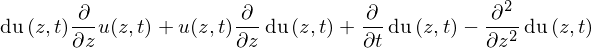

In [49]:
import sympy

z = sympy.Symbol('z', real=True)
t = sympy.Symbol('t', real=True)
a = sympy.Symbol('a', real=True)
u = sympy.Function('u')(z,t)
du = sympy.Function('du')(z,t)
f = sympy.Function('f')(z,t)

L = sympy.Derivative(u, t) + sympy.Derivative(u**2, z)/2- sympy.Derivative(u, z, z)-f

sympy.init_printing()

sympy.pretty_print(L)


sympy.Derivative(L.subs(u, u+a*du),a, evaluate=True).subs(a,0)